In [42]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline

import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.color_palette("tab10")
import warnings
warnings.filterwarnings("ignore")


## Problem statement:

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price. 

In [43]:
df1 = pd.read_excel('innercity.xlsx')

nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21613 rows and 23 columns


In [44]:
df1.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
sight,21556.0,2.343663e-01,7.664376e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
quality,21612.0,7.656857e+00,1.175484e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21612.0,2.915225e+02,4.425808e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [47]:
df1.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [48]:
df2 = df1.rename(columns = {'cid': 'House_ID', 'dayhours': 'Date_Of_Sale', 'price': 'Price', 'room_bed': 'Bedrooms', 'room_bath': 'Bath_Bed_Ratio', 'living_measure': 'Home_area', 'lot_measure': 'Plot_area', 'ceil': 'Floors', 'coast': 'Water_Facing', 'sight': 'Viewed', 'condition': 'Condition', 'quality': 'Quality', 'ceil_measure': 'Floor_area', 'basement': 'Basement', 'yr_built': 'Yr_Built', 'yr_renovated': 'Yr_Renovated', 'zipcode': 'Zipcode',
       'lat': 'Latitude', 'long': 'Longitude', 'living_measure15': 'Home_area15', 'lot_measure15': 'Plot_area15', 'furnished': 'Furnished',
       'total_area': 'Total_area'}, inplace = False)

In [49]:
df2.head().T

,0,1,2,3,4
House_ID,3876100940,3145600250,7129303070,7338220280,7950300670
Date_Of_Sale,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
Price,600000,190000,735000,257000,450000
Bedrooms,4.0000,2.0000,4.0000,3.0000,2.0000
Bath_Bed_Ratio,1.7500,1.0000,2.7500,2.5000,1.0000
Home_area,3050.0000,670.0000,3040.0000,1740.0000,1120.0000
Plot_area,9440.0000,3101.0000,2415.0000,3721.0000,4590.0000
Floors,1,1,2,2,1
Water_Facing,0,0,1,0,0
Viewed,0.0000,0.0000,4.0000,0.0000,0.0000


In [50]:
df2.dtypes

House_ID            int64
Date_Of_Sale       object
Price               int64
Bedrooms          float64
Bath_Bed_Ratio    float64
Home_area         float64
Plot_area         float64
Floors             object
Water_Facing       object
Viewed            float64
Condition          object
Quality           float64
Floor_area        float64
Basement          float64
Yr_Built           object
Yr_Renovated        int64
Zipcode             int64
Latitude          float64
Longitude          object
Home_area15       float64
Plot_area15       float64
Furnished         float64
Total_area         object
dtype: object

In [51]:
df2.isnull().any()

House_ID          False
Date_Of_Sale      False
Price             False
Bedrooms           True
Bath_Bed_Ratio     True
Home_area          True
Plot_area          True
Floors             True
Water_Facing       True
Viewed             True
Condition          True
Quality            True
Floor_area         True
Basement           True
Yr_Built           True
Yr_Renovated      False
Zipcode           False
Latitude          False
Longitude         False
Home_area15        True
Plot_area15        True
Furnished          True
Total_area         True
dtype: bool

In [52]:
df2.isna().sum()

House_ID            0
Date_Of_Sale        0
Price               0
Bedrooms          108
Bath_Bed_Ratio    108
Home_area          17
Plot_area          42
Floors             42
Water_Facing        1
Viewed             57
Condition          57
Quality             1
Floor_area          1
Basement            1
Yr_Built            1
Yr_Renovated        0
Zipcode             0
Latitude            0
Longitude           0
Home_area15       166
Plot_area15        29
Furnished          29
Total_area         29
dtype: int64

In [53]:
df2.duplicated().sum()

0

In [54]:
#missing data
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Home_area15,166,0.768056
Bedrooms,108,0.499699
Bath_Bed_Ratio,108,0.499699
Viewed,57,0.263730
Condition,57,0.263730
Plot_area,42,0.194327
Floors,42,0.194327
Total_area,29,0.134179
Furnished,29,0.134179
Plot_area15,29,0.134179


In [55]:
(df2 == 0).sum(axis=1)

0        4
1        5
2        3
3        5
4        5
        ..
21608    4
21609    4
21610    3
21611    5
21612    4
Length: 21613, dtype: int64

In [56]:
df2.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1)

0        4
1        5
2        3
3        5
4        5
        ..
21608    4
21609    4
21610    3
21611    5
21612    4
Length: 21613, dtype: int64

In [57]:
len(df2), len(df2.dropna())

(21613, 21387)

In [58]:
categoricals = []
numeric = []
other = []

split = 10


for col in list(df2.columns):
    if df2[col].dtype == 'int64' or df2[col].dtype == 'float64':
        if len(df2[col].unique()) < split:
            categoricals.append(col)
        else:
            numeric.append(col)
    else:
        if len(df2[col].unique()) < split:
            categoricals.append(col)
        else:
            other.append(col)
            
print('Categoricals:', categoricals)
print('Numeric:', numeric)
print('Other:', other)

Categoricals: ['Floors', 'Water_Facing', 'Viewed', 'Condition', 'Furnished']
Numeric: ['House_ID', 'Price', 'Bedrooms', 'Bath_Bed_Ratio', 'Home_area', 'Plot_area', 'Quality', 'Floor_area', 'Basement', 'Yr_Renovated', 'Zipcode', 'Latitude', 'Home_area15', 'Plot_area15']
Other: ['Date_Of_Sale', 'Yr_Built', 'Longitude', 'Total_area']


In [60]:
df2[['Floors', 'Water_Facing', 'Viewed', 'Condition', 'Furnished', 'Date_Of_Sale', 'Yr_Built', 'Longitude', 'Total_area']].astype(str).replace('$',np.nan)

,Floors,Water_Facing,Viewed,Condition,Furnished,Date_Of_Sale,Yr_Built,Longitude,Total_area
0,1,0,0.0,3,0.0,20150427T000000,1966,-122.183,12490
1,1,0,0.0,4,0.0,20150317T000000,1948,-122.274,3771
2,2,1,4.0,3,0.0,20140820T000000,1966,-122.256,5455
3,2,0,0.0,3,0.0,20141010T000000,2009,-122.213,5461
4,1,0,0.0,3,0.0,20150218T000000,1924,-122.285,5710
...,...,...,...,...,...,...,...,...,...
21608,2,0,0.0,3,1.0,20150310T000000,1996,-121.962,63597
21609,1,0,0.0,3,0.0,20140521T000000,1939,-122.341,5871
21610,2,0,0.0,3,1.0,20140905T000000,1978,-122.04,38122
21611,2,0,0.0,3,0.0,20150206T000000,1997,-122.316,9360


In [64]:
df2.fillna(0)

,House_ID,Date_Of_Sale,Price,Bedrooms,Bath_Bed_Ratio,Home_area,Plot_area,Floors,Water_Facing,Viewed,...,Basement,Yr_Built,Yr_Renovated,Zipcode,Latitude,Longitude,Home_area15,Plot_area15,Furnished,Total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,20150310T000000,685530,4.0,2.50,3130.0,60467.0,2,0,0.0,...,0.0,1996,0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597
21609,625049281,20140521T000000,535000,2.0,1.00,1030.0,4841.0,1,0,0.0,...,110.0,1939,0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871
21610,424069018,20140905T000000,998000,3.0,3.75,3710.0,34412.0,2,0,0.0,...,800.0,1978,0,98075,47.5888,-122.040,2390.0,34412.0,1.0,38122
21611,7258200055,20150206T000000,262000,4.0,2.50,1560.0,7800.0,2,0,0.0,...,0.0,1997,0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360


In [66]:
df2.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
df2.isnull().sum()

House_ID          0
Date_Of_Sale      0
Price             0
Bedrooms          0
Bath_Bed_Ratio    0
Home_area         0
Plot_area         0
Floors            0
Water_Facing      0
Viewed            0
Condition         0
Quality           0
Floor_area        0
Basement          0
Yr_Built          0
Yr_Renovated      0
Zipcode           0
Latitude          0
Longitude         0
Home_area15       0
Plot_area15       0
Furnished         0
Total_area        0
dtype: int64

In [67]:
df2.head(20)

,House_ID,Date_Of_Sale,Price,Bedrooms,Bath_Bed_Ratio,Home_area,Plot_area,Floors,Water_Facing,Viewed,...,Basement,Yr_Built,Yr_Renovated,Zipcode,Latitude,Longitude,Home_area15,Plot_area15,Furnished,Total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
5,8016250080,20140709T000000,245000,3.0,2.50,1610.0,7223.0,2,0,0.0,...,0.0,1994,0,98030,47.3661,$,1610.0,7162.0,0.0,8833
6,510002519,20140715T000000,466000,2.0,1.50,1140.0,1058.0,3,0,0.0,...,0.0,2005,0,98103,47.6608,-122.333,1170.0,1116.0,0.0,2198
7,1624059224,20140618T000000,1160000,4.0,3.50,4680.0,9700.0,2,0,0.0,...,1320.0,2005,0,98006,47.5703,-122.165,2800.0,12343.0,1.0,14380
8,5469503280,20140721T000000,449950,4.0,2.50,3100.0,10000.0,2,0,0.0,...,0.0,1978,0,98042,47.3741,-122.150,1850.0,9438.0,1.0,13100
9,2787460430,20141028T000000,299950,2.0,1.75,1460.0,10506.0,1,0,0.0,...,0.0,1983,0,98031,47.4048,-122.178,1460.0,8153.0,0.0,11966


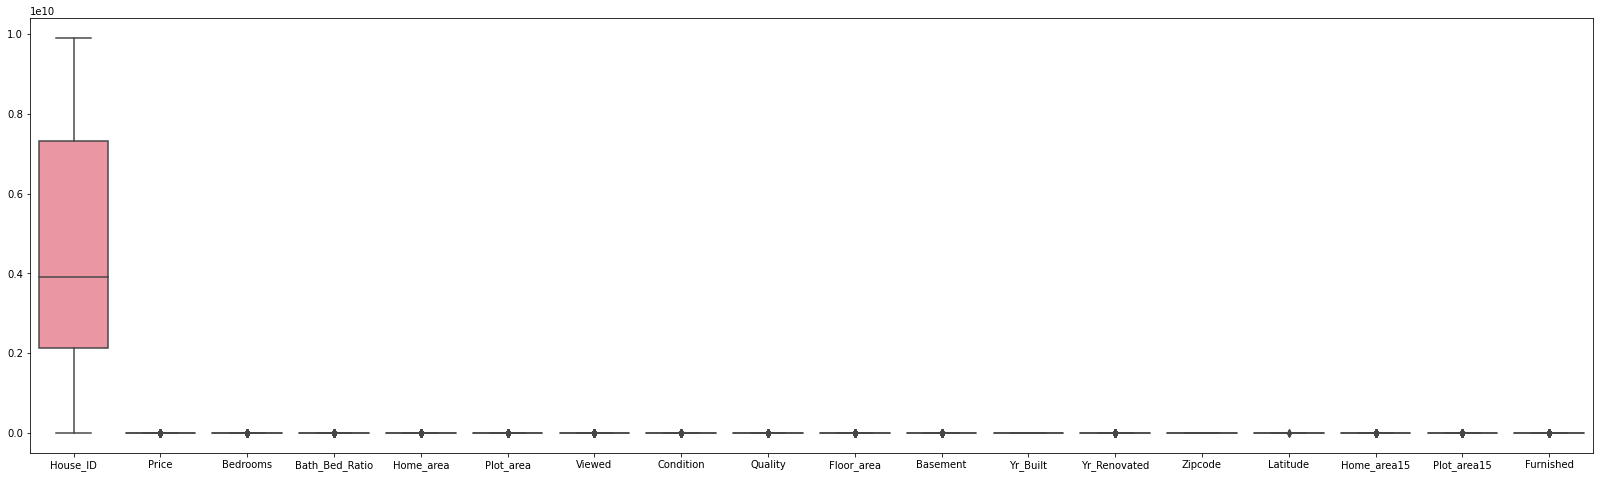

In [70]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=df2)

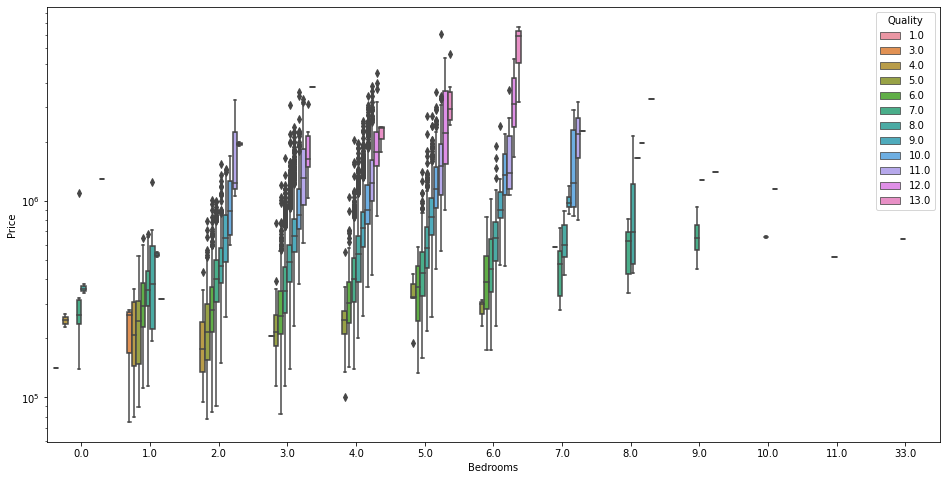

In [63]:
# Box plots of Price for each bedroom count and house grade  
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Bedrooms', y='Price', hue='Quality',#showfliers=False,
            data=df2)
ax.set_yscale('log') #needed this due to skewed prices
plt.show()

In [72]:
# Correlation matrix
df2.dataframeName = 'innercity.xlsx'
def plotCorrelationMatrix(df2, graphWidth):
    filename = df2.dataframeName
    df2 = df2.dropna('columns') # drop columns with NaN
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df2.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df2.shape[1]}) is less than 2')
        return
    corr = df2.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [73]:
# Scatter and density plots
def plotScatterMatrix(df2, plotSize, textSize):
    df2 = df2.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df2 = df2.dropna('columns')
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df2)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df2 = df2[columnNames]
    ax = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df2.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


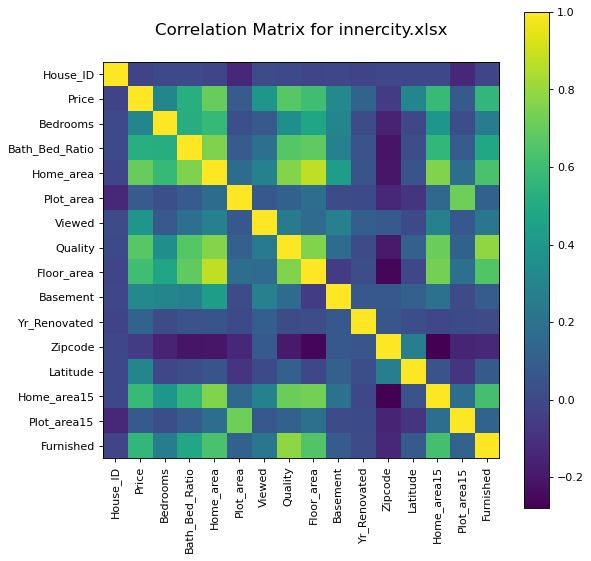

In [74]:
plotCorrelationMatrix(df2, 8)
plt.style.use('fast')

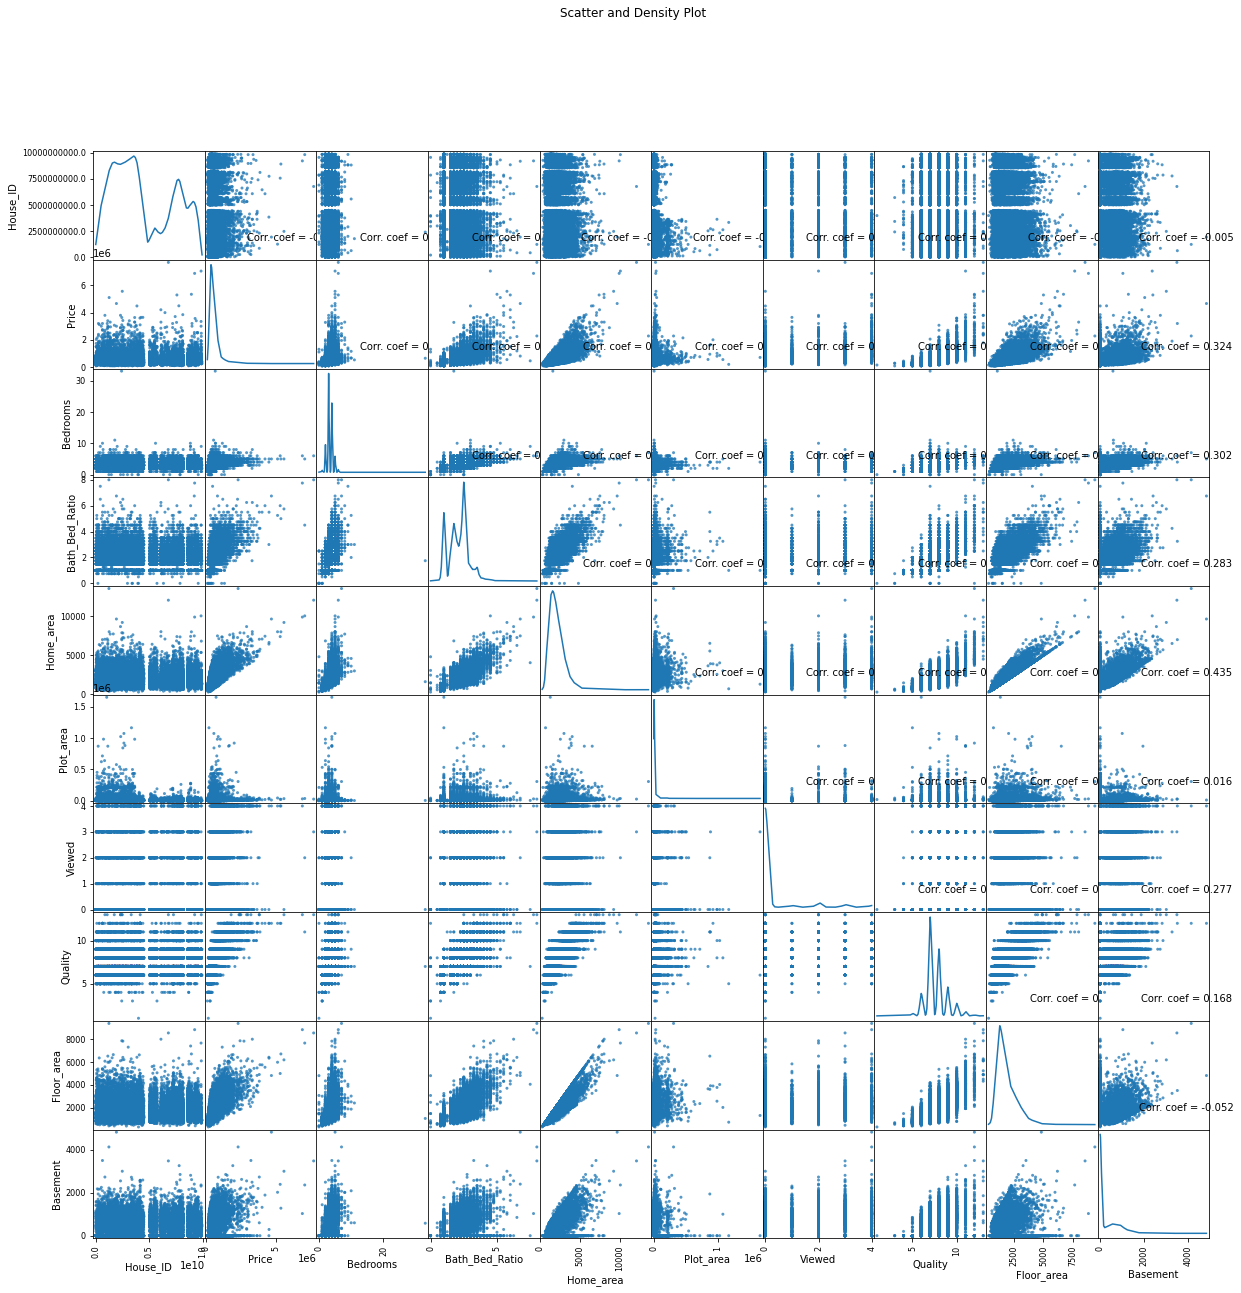

In [75]:
plotScatterMatrix(df2, 20, 10)

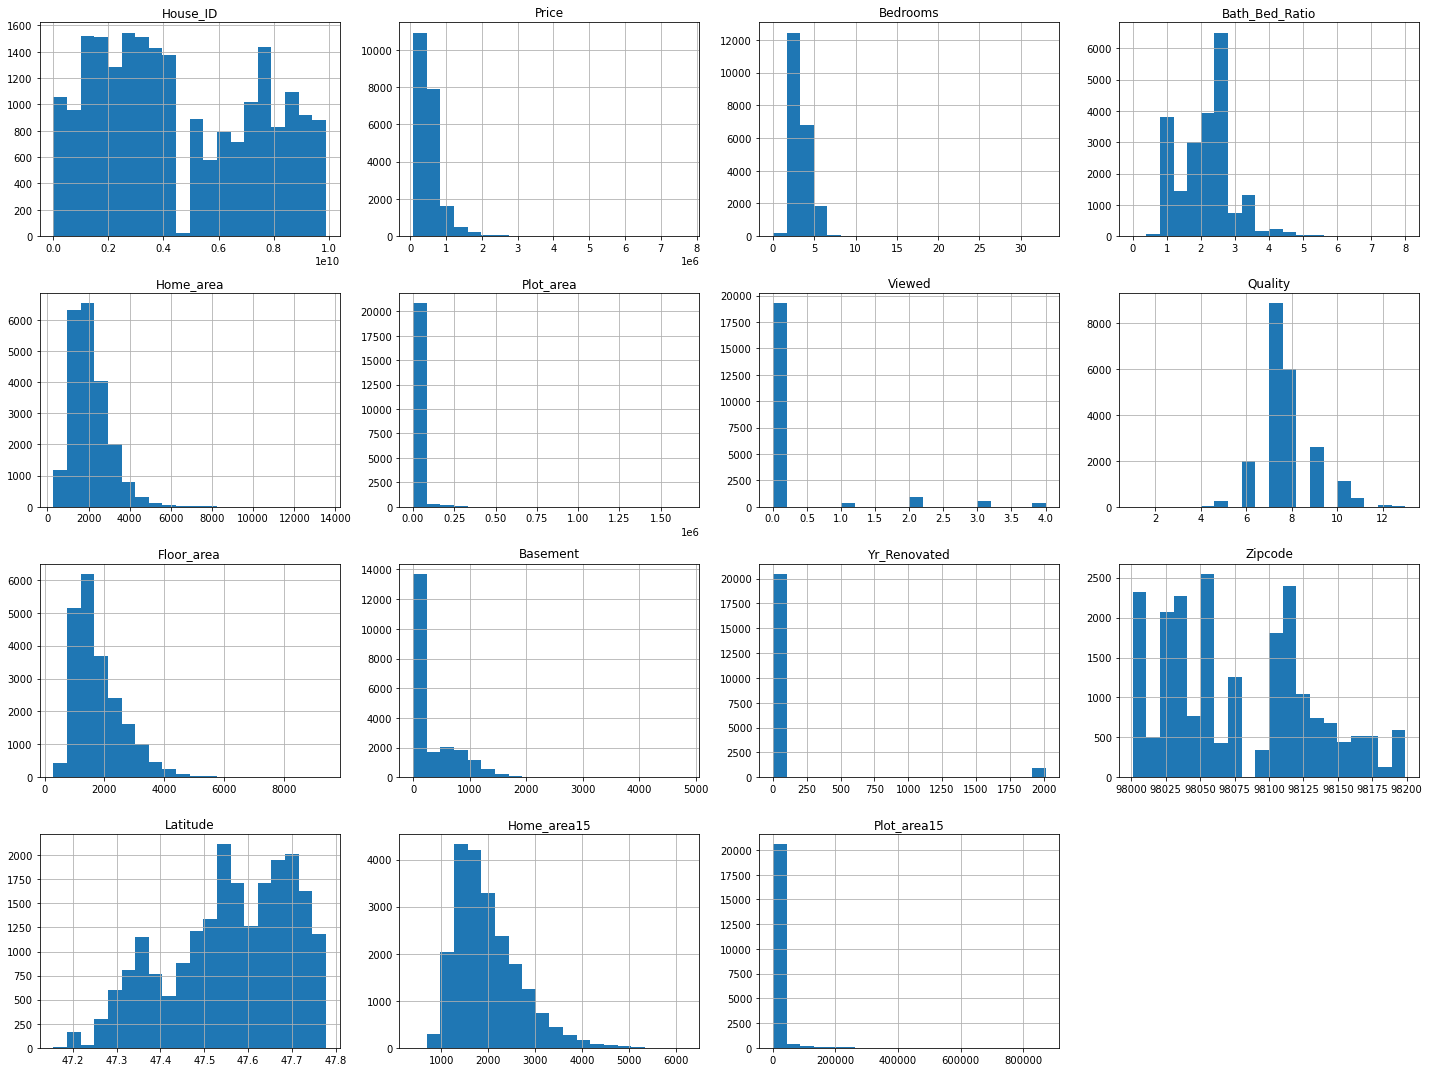

In [76]:
# matplotlib histogram
df2.iloc[:,:21].hist(bins=20, figsize=(20,15))
plt.tight_layout() # need for savefig
plt.savefig("histograms.png",format="png", dpi=300)
plt.show()

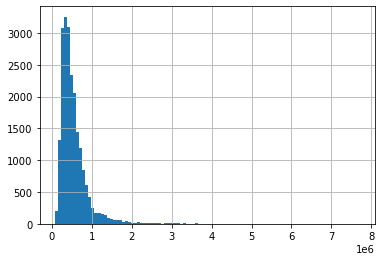

In [77]:
# histogram
df2.Price.hist(bins=100)
plt.show()

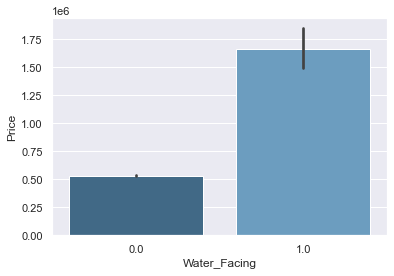

In [109]:
sns.barplot(x = "Water_Facing", y = "Price", data = df2, palette="Blues_d")

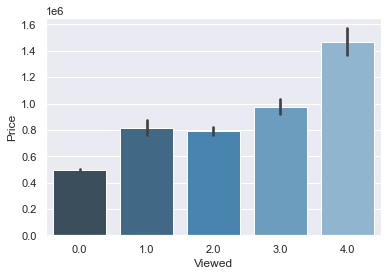

In [110]:
sns.barplot(x = "Viewed", y = "Price", data = df2, palette="Blues_d")

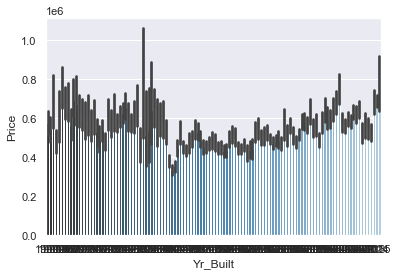

In [111]:
sns.barplot(x = "Yr_Built", y = "Price", data = df2, palette="Blues_d")

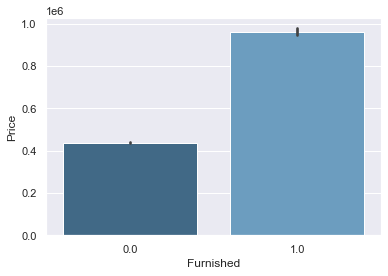

In [112]:
sns.barplot(x = "Furnished", y = "Price", data = df2, palette="Blues_d")

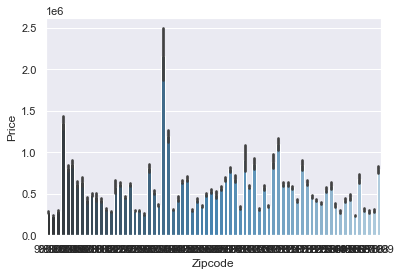

In [113]:
sns.barplot(x = "Zipcode", y = "Price", data = df2, palette="Blues_d")

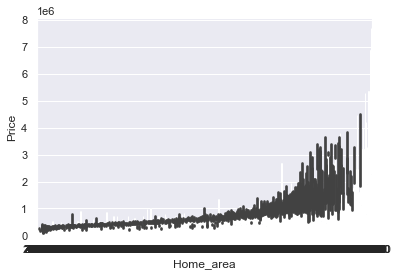

In [114]:
sns.barplot(x = "Home_area", y = "Price", data = df2, palette="Blues_d")

In [2]:
sns.distplot(df2["Condition"], palette="Blues_d")

NameError: name 'sns' is not defined

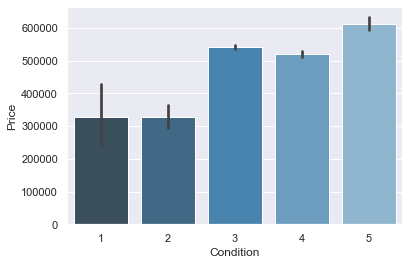

In [118]:
sns.barplot(x = "Condition", y = "Price", data = df2, palette="Blues_d")

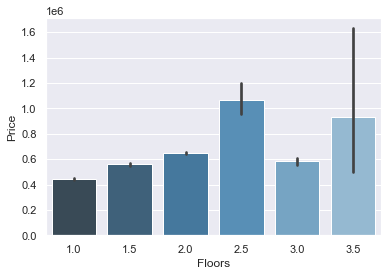

In [119]:
sns.barplot(x = "Floors", y = "Price", data = df2, palette="Blues_d")

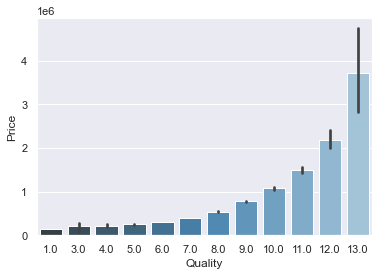

In [120]:
sns.barplot(x = "Quality", y = "Price", data = df2, palette="Blues_d")

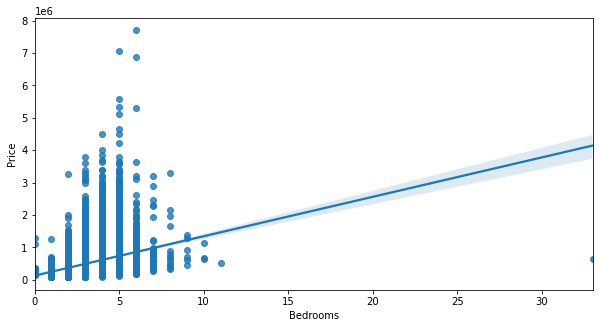

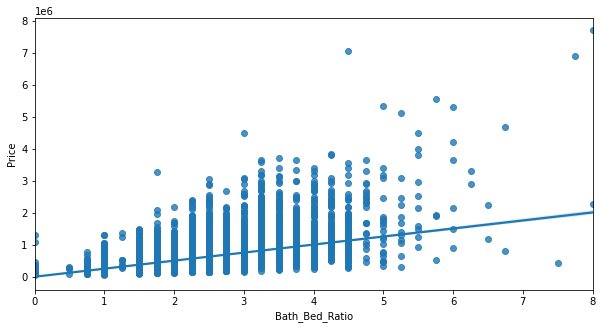

In [78]:
figure = plt.figure(figsize=(10,5),)

ax = sns.regplot(x='Bedrooms',y='Price', data=df2 ) # regression plot - scatter plot with a regression line

figure = plt.figure(figsize=(10,5),)

ax = sns.regplot(x='Bath_Bed_Ratio',y='Price', data=df2 ) # regression plot - scatter plot with a regression line

In [79]:
# average price for no. of bedrooms in house
grpby_bedrooms_df = df2[["Price", "Bedrooms"]].groupby(by = "Bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean()
grpby_bedrooms_df.head()

,Bedrooms,Price
0,0.0,410223.076923
1,1.0,318928.598985
2,2.0,401731.556939
3,3.0,466312.567534
4,4.0,635935.780910


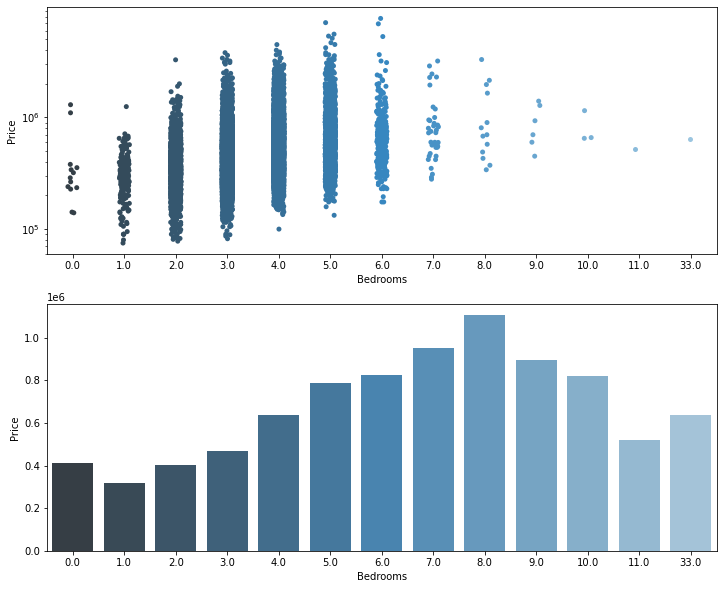

In [80]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "Bedrooms", y = "Price", data = df2, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "Bedrooms", y = "Price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")

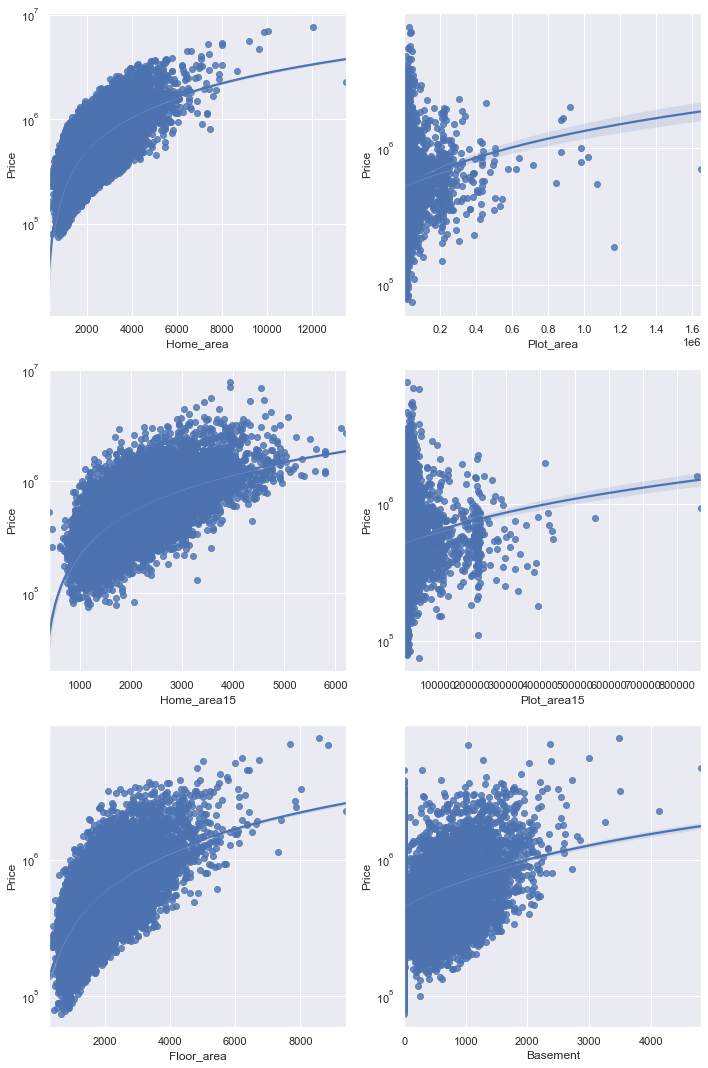

In [81]:
sns.set(color_codes=True)
sqft = ["Home_area", "Plot_area", "Home_area15", "Plot_area15", "Floor_area", "Basement"]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10, 15))
ax1.set(yscale = "log")
ax2.set(yscale = "log")
ax3.set(yscale = "log")
ax4.set(yscale = "log")
ax5.set(yscale = "log")
ax6.set(yscale = "log")

sns.regplot(x = sqft[0], y = "Price", data = df2, ax = ax1)
sns.regplot(x = sqft[1], y = "Price", data = df2, ax = ax2)
sns.regplot(x = sqft[2], y = "Price", data = df2, ax = ax3)
sns.regplot(x = sqft[3], y = "Price", data = df2, ax = ax4)
sns.regplot(x = sqft[4], y = "Price", data = df2, ax = ax5)
sns.regplot(x = sqft[5], y = "Price", data = df2, ax = ax6)

fig.tight_layout()

# sns.pairplot(df2, y_vars = sqft, x_vars = ["Price"], size = 5, kind = "reg")

In [82]:
df2["Basement"] = df2['Basement'].apply(lambda x: 1 if x > 0 else 0)

In [83]:
grpby_Basement_df = df2[["Basement", "Price"]].groupby(by = "Basement", 
                                                               as_index = False)
grpby_Basement_df = grpby_Basement_df.mean()

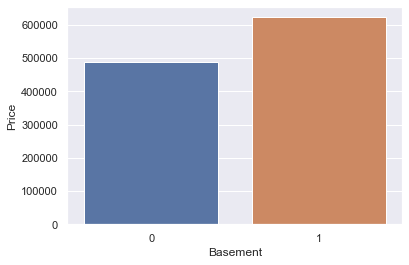

In [84]:
sns.barplot(x = "Basement", y = "Price", data = grpby_Basement_df)

In [85]:
idx = df2['Viewed'].isna()

In [86]:
df2.Viewed.median()

0.0

In [87]:
df2.loc[idx, 'Viewed'] = df2.Viewed.median()

df2.Viewed.isna().sum()

0

In [88]:
idx = df2[df2.Bedrooms > 8]

In [89]:
df2 = df2.drop(idx.index)

In [90]:
len(df2)

21376

In [91]:
df2.Bedrooms.isna().sum()

0

In [92]:
df2["Yr_Sold"] = df2["Date_Of_Sale"].apply(lambda x:x.split('T')[0][:4])

In [93]:
df2 = df2.drop(columns = 'House_ID')

In [94]:
df2 = df2.drop(columns = 'Date_Of_Sale')

In [95]:
df2.head()

,Price,Bedrooms,Bath_Bed_Ratio,Home_area,Plot_area,Floors,Water_Facing,Viewed,Condition,Quality,...,Yr_Built,Yr_Renovated,Zipcode,Latitude,Longitude,Home_area15,Plot_area15,Furnished,Total_area,Yr_Sold
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,...,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490,2015
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,...,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771,2015
2,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,...,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455,2014
3,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,...,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461,2014
4,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,...,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710,2015


Text(0.5, 1.0, 'PEARSON CORRELATION')

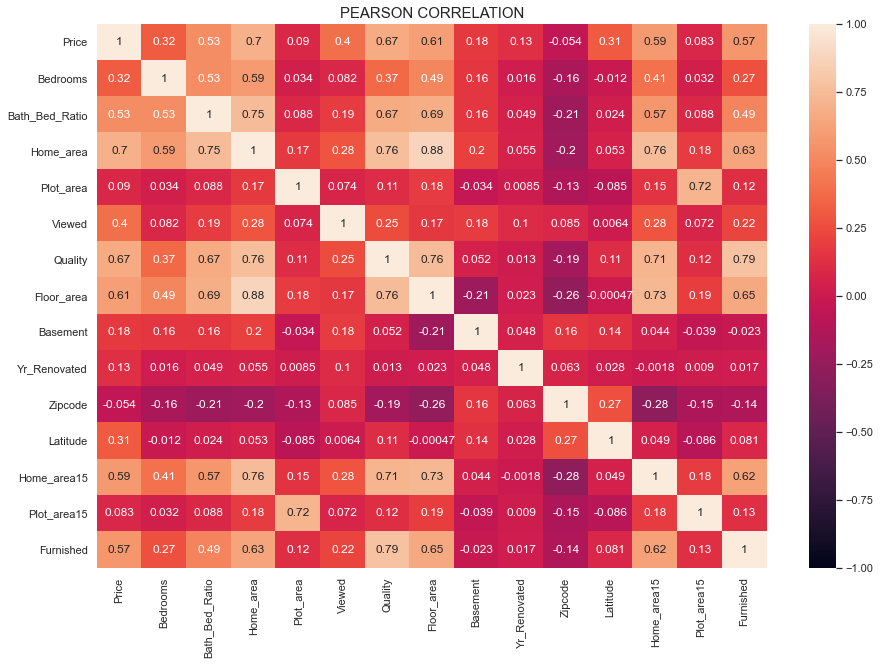

In [96]:
#PEARSON CORRELATION

plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(method="pearson"), annot=True, vmin=-1, vmax=1)
plt.title('PEARSON CORRELATION', fontsize=15)

Text(0.5, 1.0, 'SPEARMAN CORRELATION')

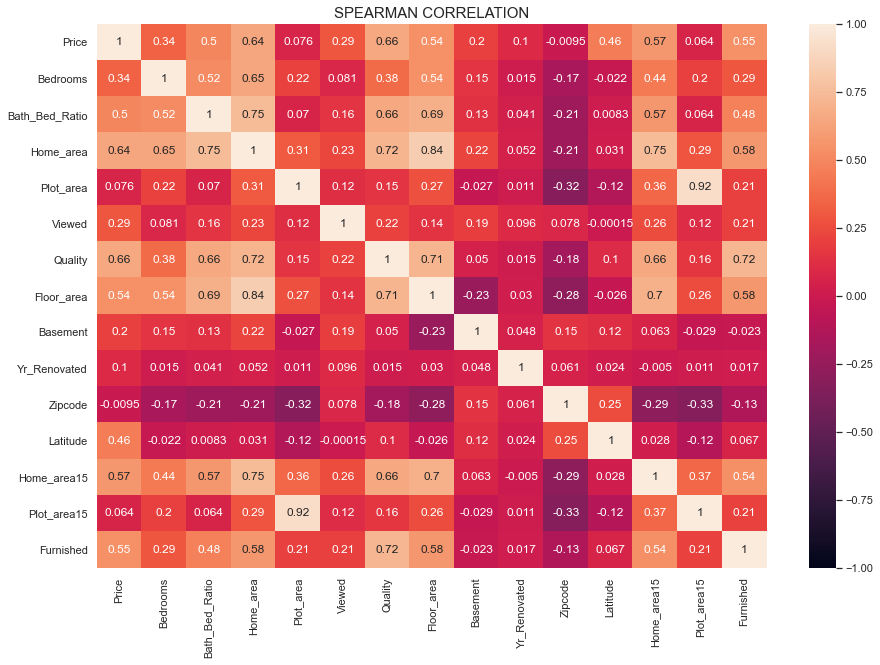

In [97]:
#SPEARMAN CORRELATION

plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(method="spearman"),  annot=True, vmin=-1, vmax=1)
plt.title('SPEARMAN CORRELATION', fontsize=15)

Text(0.5, 1.0, 'KENDALL CORRELATION')

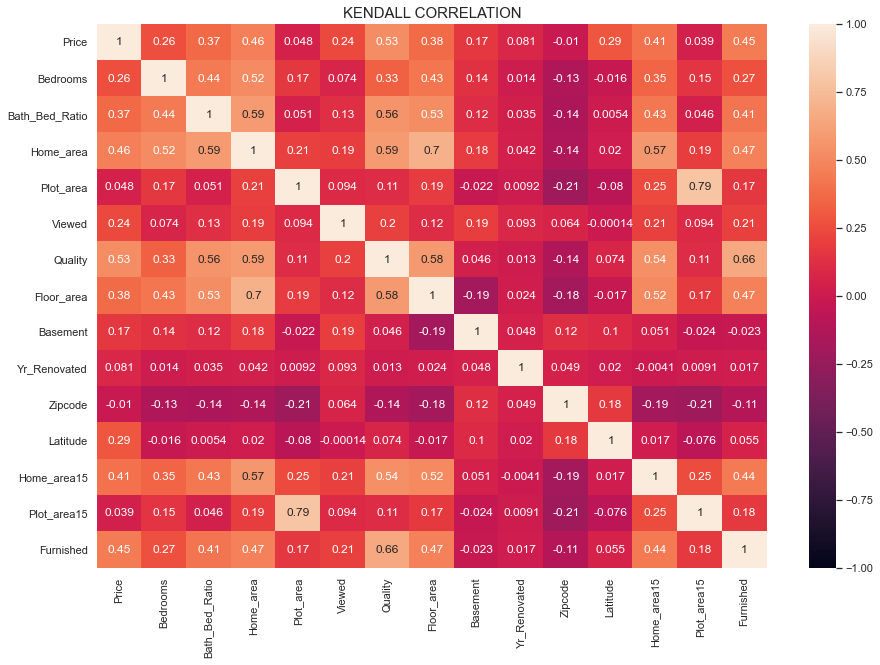

In [98]:
#KENDALL CORRELATION

plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(method="kendall"), annot=True, vmin=-1, vmax=1)
plt.title('KENDALL CORRELATION', fontsize=15)

In [100]:
df2 = df2.replace('$', np.nan)
# print the first 20 rows of data
print(df2.head(20))

      Price  Bedrooms  Bath_Bed_Ratio  Home_area  Plot_area  Floors  \
0    600000       4.0            1.75     3050.0     9440.0     1.0   
1    190000       2.0            1.00      670.0     3101.0     1.0   
2    735000       4.0            2.75     3040.0     2415.0     2.0   
3    257000       3.0            2.50     1740.0     3721.0     2.0   
4    450000       2.0            1.00     1120.0     4590.0     1.0   
5    245000       3.0            2.50     1610.0     7223.0     2.0   
6    466000       2.0            1.50     1140.0     1058.0     3.0   
7   1160000       4.0            3.50     4680.0     9700.0     2.0   
8    449950       4.0            2.50     3100.0    10000.0     2.0   
9    299950       2.0            1.75     1460.0    10506.0     1.0   
10   555000       4.0            2.50     3310.0     6500.0     2.0   
11   550000       3.0            1.00     1520.0     2500.0     1.5   
12   480000       3.0            2.50     2450.0    28185.0     2.0   
13   1

In [101]:
df2.to_csv('Cleaned_Housing_Data.csv', index = False)